In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8703 - loss: 0.4434
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9648 - loss: 0.1183
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9785 - loss: 0.0730
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9851 - loss: 0.0493
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9891 - loss: 0.0368


In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([3.49204385e-07, 2.18832952e-08, 2.50738121e-05, 1.18500473e-04,
       1.91500524e-10, 1.31868248e-07, 1.06688394e-10, 9.99838352e-01,
       8.52312382e-07, 1.68207462e-05], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
test_labels[0]

7

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test Accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.0738
Test Accuracy: 0.980


In [18]:
import numpy as np

x = np.array(12)
x.ndim

0

In [30]:
x = np.arange(27)

x.ndim

1

In [31]:
x.reshape((9, 3)).ndim

2

In [32]:
x.reshape((3, 3, 3)).ndim

3

In [33]:
train_images.ndim, train_labels.ndim

(2, 1)

In [34]:
train_images.dtype

dtype('float32')

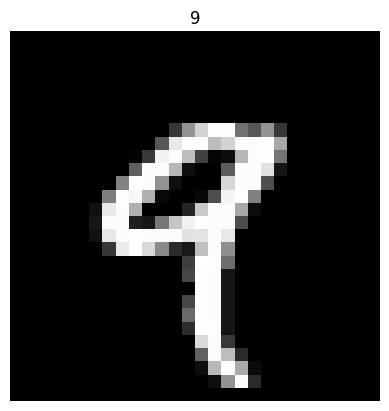

In [43]:
import matplotlib.pyplot as plt

idx = 4
digit = train_images[idx] * 255
plt.imshow(digit.reshape(28, 28), cmap='gray')
plt.title(train_labels[idx])
plt.axis('off')
plt.show()

In [47]:
batch = train_images[:123]
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 784)

In [48]:
def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i][j] = max(x[i, j], 0)

  return x

In [49]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i][j] += y[i, j]

  return x

In [51]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()

for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.)

print(f'Took: {time.time() - t0} s')

Took: 0.009012699127197266 s


In [52]:
t0 = time.time()

for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)

print(f'Took: {time.time() - t0} s')

Took: 2.500682830810547 s


In [59]:
X = np.random.random((32, 10))
y = np.random.random(10)

In [61]:
y = np.expand_dims(y, axis=0)
y # unsqueeze

array([[0.20543489, 0.86164595, 0.88446171, 0.3669073 , 0.76840334,
        0.91641318, 0.66377152, 0.97457084, 0.63531137, 0.90996272]])

In [63]:
Y = np.concatenate([y] * 32, axis=0)
Y.shape

(32, 10)

In [64]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]

  return x

In [74]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

In [77]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

6.869707596256616

In [79]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0.

  for i in range(x.shape[0]):
    z += x[i] * y[i]

  return z

In [80]:
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]

  return z

In [81]:
def naive_matrix_vector_dot(x, y):
  z = np.zeros(x.shape[0])

  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)

  return z

In [82]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))

  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_matrix_vector_dot(row_x, column_y)

  return z

In [85]:
x = np.array([[0, 1],
              [2, 3],
              [4, 5]], dtype='float')
x.shape

(3, 2)

In [86]:
x.reshape((6, 1))

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [88]:
x = np.zeros((52, 100))
x.T.shape

(100, 52)

In [89]:
import tensorflow as tf

x = tf.Variable(0.)
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrtx = tape.gradient(y, x)

tf.random.uniform(shape,
    minval=0,
    maxval=None,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)

In [90]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad_of_y_wrtx = tape.gradient(y, x)

In [91]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.52843976, 0.89073753],
       [0.1827209 , 0.9141884 ]], dtype=float32)>

In [92]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
  y = tf.matmul(x, W) + b
grad_of_y_wrtx = tape.gradient(y, [W, b])

In [93]:
from keras import Sequential
from keras.layers import Dense

In [94]:
model = keras.Sequential([
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [95]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9016 - loss: 0.3363
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9745 - loss: 0.0873
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9824 - loss: 0.0584
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9863 - loss: 0.0444
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9906 - loss: 0.0323


In [98]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test Accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0944
Test Accuracy: 0.980


In [125]:
class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation

    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
    self.W = tf.Variable(w_initial_value)

    b_shape = (output_size,)
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
    return [self.W, self.b]

In [126]:
class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs

    for layer in self.layers:
      x = layer(x)

    return x

  @property
  def weights(self):
    weights = []

    for layer in self.layers:
      weights += layer.weights

    return weights

In [127]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

assert len(model.weights) == 4

# Batch Generator

In [128]:
import math

class BatchGenerator:
  def __init__(self, images, labels, batch_size=128):
    assert len(images) == len(labels)
    self.index = 0
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches = math.ceil(len(images) / batch_size)

  def next(self):
    images = self.images[self.index : self.index + self.batch_size]
    labels = self.labels[self.index : self.index + self.batch_size]
    self.index += self.batch_size
    return images, labels

In [146]:
def one_training_step(model, images_batch, labels_batch):
  with tf.GradientTape() as tape:
    predictions = model(images_batch)
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
    average_loss = tf.reduce_mean(per_sample_losses)
  gradients = tape.gradient(average_loss, model.weights)
  update_weights(gradients, model.weights)
  return average_loss

learning_rate = 1e-3

def update_weights(gradients, weights):
  for g, w, in zip(gradients, weights):
    w.assign_sub(g * learning_rate)

In [147]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=learning_rate)

def update_weights(gradients, weights):
  optimizer.apply_gradients(zip(gradients, weights))

In [197]:
def fit(model, images, labels, epochs=5, batch_size=128):
  for epoch_counter in range(epochs):
    print(f'Epoch {epoch_counter} |', end=' ')
    batch_generator = BatchGenerator(images, labels)
    for batch_counter in range(batch_generator.num_batches):
      images_batch, labels_batch = batch_generator.next()
      loss = one_training_step(model, images_batch, labels_batch)
      if batch_counter == 0:
        # print(f'loss at batch {batch_counter}: {loss}')
        print(f'loss at batch : {loss}')

In [198]:
fit(model, train_images, train_labels)

Epoch 0 | loss at batch : 0.6245404481887817
Epoch 1 | loss at batch : 0.5912632942199707
Epoch 2 | loss at batch : 0.5633127689361572
Epoch 3 | loss at batch : 0.5394849181175232
Epoch 4 | loss at batch : 0.5189070701599121


Точность ниже т.к SGD

In [199]:
predictions = model(test_images).numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f'Accuracy: {matches.mean():.2f}')

Accuracy: 0.84
